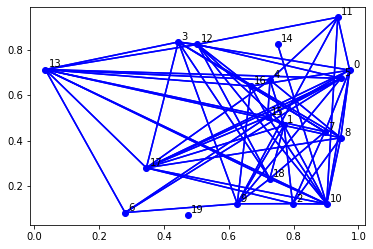

In [1]:
import numpy as np
import algos.graphdrawing as gd
      
V, adj_V = gd.gen_graph(num_verts=20, max_nbrs=10)
gd.draw(V, adj_V)

# Edge-Edge Repulsion (Lin & Yen, 2012)
Apply forces based on the angle formed by incident edges.

Angular resolution: 0.7004384375622604


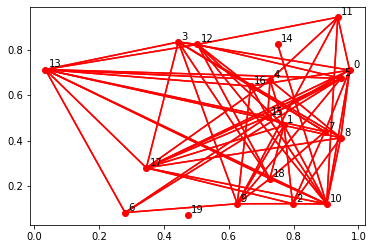

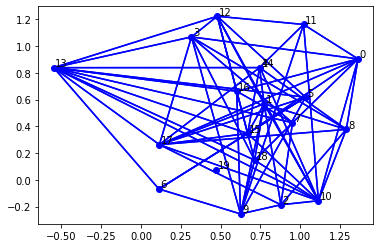

Angular resolution: 0.7225051932919891


In [2]:
import algos.lin_yen as ly
import algos.geometry as geo
import matplotlib.pyplot as plt
from importlib import reload

reload(ly)
gd.draw(V, adj_V, 'r')
print(f'Angular resolution: {geo.get_angular_res(V, adj_V)}')
W = ly.ee_repulsion(V, adj_V, C0=1, C1=0.01)
plt.show()

gd.draw(W, adj_V)
plt.show() 

print(f'Angular resolution: {geo.get_angular_res(W, adj_V)}')

# Force-directed edge-vertex repulsion

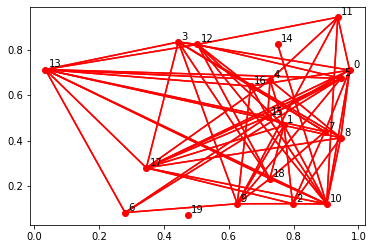

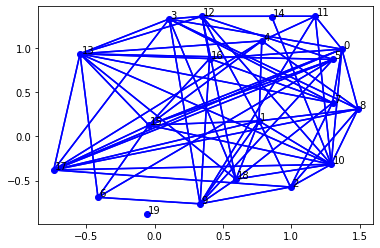

In [3]:
import numpy as np
import math
import algos.lin_yen as ly

      
gd.draw(V, adj_V, 'r')
plt.show()
W = ly.ev_repulsion(V, adj_V, N=10, C1=1, C2=1, C3=0.001)
gd.draw(W, adj_V)
plt.show()

# Vertex-vertex repulsion (Birchfield & Overbye, 2018)

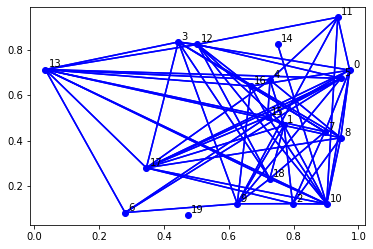

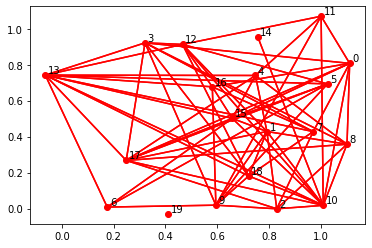

In [4]:
import algos.birchfield as bf
import algos
from importlib import reload

reload(algos.birchfield)
gd.draw(V, adj_V, 'b')
plt.show()
W = bf.force_directed(V, adj_V, N=10, C1=2, C2=0.1, C3=0.005)
gd.draw(W, adj_V, 'r')

# Line intersections

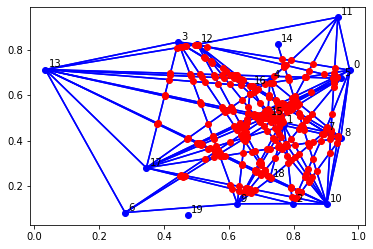

In [5]:
import matplotlib.pyplot as plt
from importlib import reload

ints = geo.get_intersects(V, adj_V)
gd.draw(V, adj_V, 'b')
C = np.array([c['intersection'] for c in ints])
plt.plot(C[:,0], C[:,1], 'ro')
plt.show()

# Used later for cross resolution maximization

# Algorithm for Cross Angular Resolution

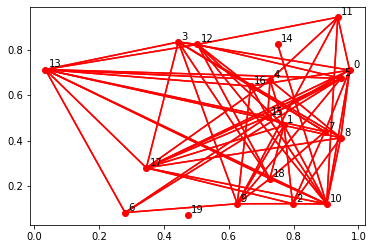

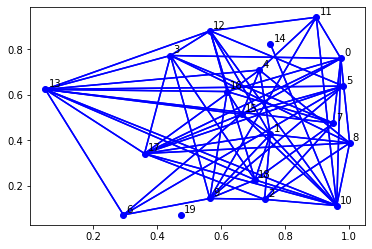

In [6]:
reload(ly)
W = ly.cross_repulsion(V, adj_V, N=15, C0=1, C1=0.001, C2=0.001)
gd.draw(V, adj_V, 'r')
plt.show()
gd.draw(W, adj_V)
plt.show()

# BIGANGLE

Original graph V


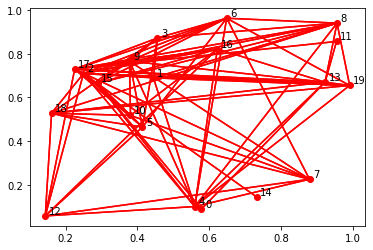

Big angle without forces to original positions


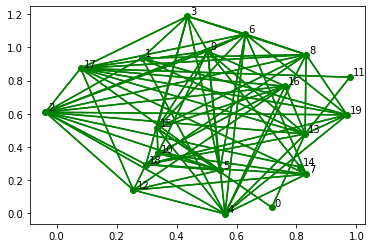

Big angle with forces to original positions


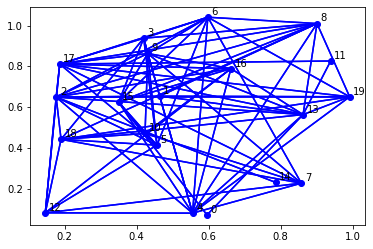

Combined


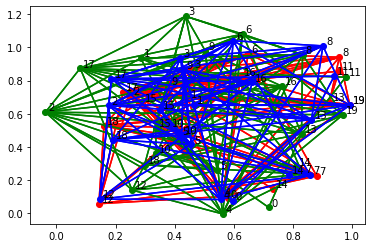

In [7]:
import algos.lin_yen as ly

reload(ly)
print('Original graph V')
gd.draw(V, adj_V, 'r')
plt.show()

print('Big angle without forces to original positions')
W1 = ly.bigangle(V, adj_V, N=15, C0=1, C1=0.01, C2=1, C3=0.001, F2V=False)
gd.draw(W1, adj_V, 'g')
plt.show()

print('Big angle with forces to original positions')
W2 = ly.bigangle(V, adj_V, N=15, C0=500, C1=0.01, C2=1, C3=0.001, F2V=True)
gd.draw(W2, adj_V, 'b')
plt.show()

print('Combined')
gd.draw(V, adj_V, 'r')
gd.draw(W1, adj_V, 'g')
gd.draw(W2, adj_V, 'b')
plt.show()

Big angle with forces to original positions
i = 0 tensor(102.2007, dtype=torch.float64, grad_fn=<SumBackward0>)
i = 1 tensor(98.8654, dtype=torch.float64, grad_fn=<SumBackward0>)
i = 2 tensor(97.4625, dtype=torch.float64, grad_fn=<SumBackward0>)
i = 3 tensor(96.1440, dtype=torch.float64, grad_fn=<SumBackward0>)
i = 4 tensor(96.5574, dtype=torch.float64, grad_fn=<SumBackward0>)
i = 5 tensor(92.1343, dtype=torch.float64, grad_fn=<SumBackward0>)
i = 6 tensor(90.9026, dtype=torch.float64, grad_fn=<SumBackward0>)
i = 7 tensor(91.7499, dtype=torch.float64, grad_fn=<SumBackward0>)
i = 8 tensor(88.5469, dtype=torch.float64, grad_fn=<SumBackward0>)
i = 9 tensor(88.0220, dtype=torch.float64, grad_fn=<SumBackward0>)
i = 10 tensor(87.5940, dtype=torch.float64, grad_fn=<SumBackward0>)
i = 11 tensor(87.2393, dtype=torch.float64, grad_fn=<SumBackward0>)
i = 12 tensor(86.9419, dtype=torch.float64, grad_fn=<SumBackward0>)
i = 13 tensor(87.0758, dtype=torch.float64, grad_fn=<SumBackward0>)
i = 14 tensor

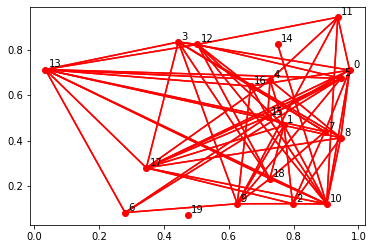

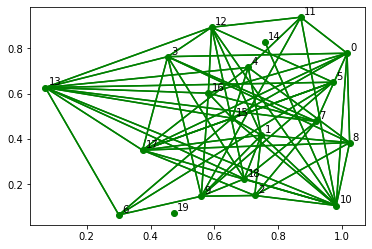

In [83]:
from importlib import reload

reload(ly)

print('Big angle with forces to original positions')
W2 = ly.bigangle(V, adj_V, N=25, C0=0, C1=0.001, C2=0, C3=0.001, F2V=False)
gd.draw(V, adj_V, 'r')
plt.show()
gd.draw(W2, adj_V, 'g')
plt.show()


# Map dingetjes

In [8]:
import pandas as pd
import geopandas as gpd

# Haal de kaart met gemeentegrenzen op van PDOK
geodata_url = 'https://geodata.nationaalgeoregister.nl/cbsgebiedsindelingen/wfs?request=GetFeature&service=WFS&version=2.0.0&typeName=cbs_gemeente_2017_gegeneraliseerd&outputFormat=json'
gemeentegrenzen = gpd.read_file(geodata_url)

<AxesSubplot:>

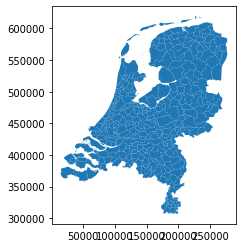

In [9]:
gemeentegrenzen.plot()

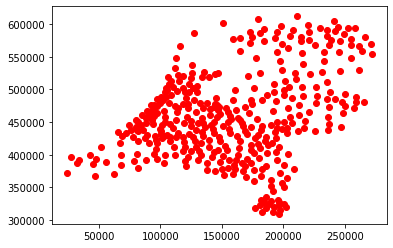

In [10]:
cents = [gem.centroid.xy for gem in gemeentegrenzen['geometry']]
cents = np.array(cents)
plt.plot(cents[:,0], cents[:,1], 'ro')
plt.show()

# Data from Json

# Displacement measure & simple visualization
Darker the 

Total sum of (squared) displacement: 0.1556187424370087


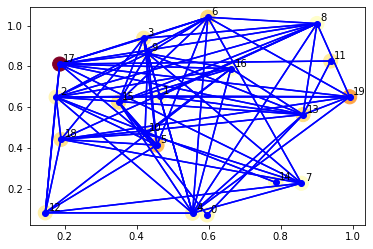

In [11]:
import algos.geometry as geo
from importlib import reload

reload(geo)
disps = geo.get_displacement(V, W)
print(f"Total sum of (squared) displacement: {sum(disps)}")
gd.draw(W2, adj_V, 'b')
plt.scatter(x=W2[:,0], y=W2[:,1], c=disps, s=200, cmap='YlOrRd')
plt.show()

In [12]:
import algos.geometry as geo
from numpy.linalg import norm

ints = geo.get_intersects(W2, adj_V)
L_cam = []
for it in ints:
  i = it['e1'][0]
  j = it['e1'][1]
  k = it['e2'][0]
  l = it['e2'][1]
  ij = W[i] - W[j]
  kl = W[k] - W[l]
  t = [ij, kl]
  b = np.dot(norm(ij), norm(kl))
  L_cam.append((t / b) ** 2)
print(L_cam)

[array([[0.50836746, 1.84138045],
       [0.01354827, 2.95738597]]), array([[1.58052655, 5.72489568],
       [2.295446  , 0.67548825]]), array([[0.39184088, 1.41930432],
       [1.66298724, 1.307947  ]]), array([[0.22417994, 0.81201215],
       [0.02171399, 2.94922026]]), array([[1.22000459, 4.41903302],
       [2.40387106, 0.56706319]]), array([[0.3905514 , 1.41463364],
       [0.04314042, 2.92779383]]), array([[0.52329076, 1.8954348 ],
       [0.76302356, 2.20791069]]), array([[0.23330173, 0.84505261],
       [0.58787566, 2.38305859]]), array([[0.38585049, 1.39760625],
       [0.07063403, 2.90030021]]), array([[0.53340254, 1.93206113],
       [1.4709068 , 1.50002745]]), array([[0.81647364, 2.95738558],
       [1.29006935, 1.68086489]]), array([[0.65541962, 2.37402464],
       [1.2337383 , 1.73719595]]), array([[1.56248775, 5.65955652],
       [2.89886962, 0.07206463]]), array([[0.43269343, 1.56727815],
       [2.84083995, 0.13009429]]), array([[0.392654  , 1.42224955],
       [2.7937

In [13]:
import algos.odf_vis as odf
from importlib import reload

reload(odf)
coords, adj_gem = odf.get_ww()

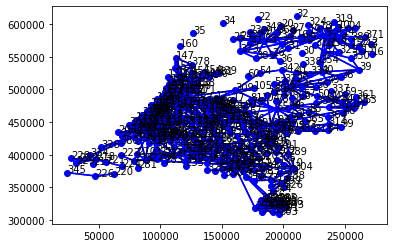

In [14]:
W = ly.bigangle(coords, adj_gem, N=1, C0=1, C1=0.01, C2=1, C3=1, F2V=True)

gd.draw(coords, adj_gem)
plt.show()

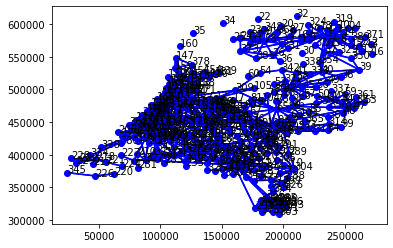

In [15]:
gd.draw(W, adj_gem)
plt.savefig('w.jpg')